In [4]:
import os
os.chdir("..")

In [5]:
from scripts.utils.abbreviations import abbrevations
from transformers import AutoModelForMaskedLM, AutoTokenizer
from datasets import load_dataset
from tqdm import tqdm
from scripts.utils.TweetNormalizer import normalizeTweet

configs = ['emoji', 'emotion', 'hate', 'irony', 'offensive', 'sentiment', 'stance_abortion', 'stance_atheism', 'stance_climate', 'stance_feminist', 'stance_hillary']
bertweet = AutoModelForMaskedLM.from_pretrained("vinai/bertweet-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")
datasets = [load_dataset("cardiffnlp/tweet_eval", config) for config in configs]
tweet_dict = {}
for full_length, abbr in tqdm(abbrevations.items()): 
    if  tokenizer.convert_ids_to_tokens(tokenizer.convert_tokens_to_ids(abbr)) == tokenizer.unk_token:
        print("abbreviation unknown: ", abbr)
        pass
    print("abbreviation: ", abbr)
    count_fl = 0
    count_abbr = 0
    tweets_with_abbr = []
    tweets_with_fl = []
    fl_normalized = normalizeTweet(full_length)
    fl_tokenized = tokenizer.tokenize(fl_normalized)
    abbr_normalized = normalizeTweet(abbr)
    abbr_tokenized =  tokenizer.tokenize(abbr_normalized)
    for dataset in datasets:
        for split in dataset:
            for i in range(len(dataset[split])):
                normalized_line = normalizeTweet(tweet=dataset[split][i]["text"])
                normalized_line = normalized_line.lower()
                normalized_line = normalized_line.replace("'", "")
                tokens = tokenizer.tokenize(normalized_line)
                tokens = [t.lower() for t in tokens]
                tokens = [t.replace("'", "") for t in tokens]
                fl_tokenized = [t.lower() for t in fl_tokenized]
                fl_tokenized = [t.replace("'", "") for t in fl_tokenized]
                abbr_tokenized = [t.lower() for t in abbr_tokenized]
                abbr_tokenized = [t.replace("'", "") for t in abbr_tokenized]
                fl_in_tweet = [tokens[idx: idx + len(fl_tokenized)] == fl_tokenized for idx in range(len(tokens) - len(fl_tokenized) + 1)].count(True)
                abbr_in_tweet = [tokens[idx: idx + len(abbr_tokenized)] == abbr_tokenized for idx in range(len(tokens) - len(abbr_tokenized) + 1)].count(True)

                if fl_in_tweet > 0:
                    count_fl += fl_in_tweet
                    tweets_with_fl.append(dataset[split][i]["text"])
                if abbr_in_tweet > 0:
                    count_abbr+= abbr_in_tweet
                    tweets_with_abbr.append(dataset[split][i]["text"])
    tweet_dict[abbr] = tweets_with_abbr
    tweet_dict[full_length] = tweets_with_fl

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/40 [00:00<?, ?it/s]

abbreviation:  idk


  2%|▎         | 1/40 [00:59<38:35, 59.38s/it]

abbreviation:  rn


  5%|▌         | 2/40 [01:52<35:23, 55.87s/it]

abbreviation:  omg


  8%|▊         | 3/40 [02:45<33:29, 54.32s/it]

abbreviation:  idc


 10%|█         | 4/40 [03:36<31:49, 53.03s/it]

abbreviation:  lol


 12%|█▎        | 5/40 [04:27<30:30, 52.30s/it]

abbreviation:  bro


 15%|█▌        | 6/40 [05:21<29:57, 52.87s/it]

abbreviation:  dm


 18%|█▊        | 7/40 [06:14<29:02, 52.82s/it]

abbreviation:  wtf


 20%|██        | 8/40 [07:06<28:10, 52.81s/it]

abbreviation:  lmao


 22%|██▎       | 9/40 [07:58<27:09, 52.57s/it]

abbreviation:  sry


 25%|██▌       | 10/40 [08:50<26:10, 52.36s/it]

abbreviation:  v


 28%|██▊       | 11/40 [09:42<25:16, 52.30s/it]

abbreviation:  w


 30%|███       | 12/40 [10:35<24:30, 52.51s/it]

abbreviation:  nvm


 32%|███▎      | 13/40 [11:26<23:21, 51.90s/it]

abbreviation:  rofl


 35%|███▌      | 14/40 [12:16<22:11, 51.23s/it]

abbreviation:  lmk


 38%|███▊      | 15/40 [13:06<21:13, 50.92s/it]

abbreviation:  ily


 40%|████      | 16/40 [13:56<20:15, 50.66s/it]

abbreviation:  yolo


 42%|████▎     | 17/40 [14:46<19:18, 50.39s/it]

abbreviation:  lmfao


 45%|████▌     | 18/40 [15:35<18:21, 50.08s/it]

abbreviation:  ikr


 48%|████▊     | 19/40 [16:26<17:35, 50.24s/it]

abbreviation:  ofc


 50%|█████     | 20/40 [17:15<16:42, 50.13s/it]

abbreviation:  u


 52%|█████▎    | 21/40 [18:06<15:57, 50.39s/it]

abbreviation:  r


 55%|█████▌    | 22/40 [18:57<15:06, 50.35s/it]

abbreviation:  abt


 57%|█████▊    | 23/40 [19:46<14:10, 50.01s/it]

abbreviation:  tbh


 60%|██████    | 24/40 [20:36<13:18, 49.90s/it]

abbreviation:  tbt


 62%|██████▎   | 25/40 [21:26<12:29, 49.98s/it]

abbreviation:  smh


 65%|██████▌   | 26/40 [22:15<11:37, 49.83s/it]

abbreviation:  rt


 68%|██████▊   | 27/40 [23:06<10:50, 50.00s/it]

abbreviation:  kk


 70%|███████   | 28/40 [23:56<10:00, 50.03s/it]

abbreviation:  imo


 72%|███████▎  | 29/40 [24:46<09:09, 49.96s/it]

abbreviation:  ic


 75%|███████▌  | 30/40 [25:36<08:20, 50.03s/it]

abbreviation:  ht


 78%|███████▊  | 31/40 [26:26<07:29, 50.00s/it]

abbreviation:  ftw


 80%|████████  | 32/40 [27:15<06:38, 49.77s/it]

abbreviation:  fab


 82%|████████▎ | 33/40 [28:05<05:48, 49.80s/it]

abbreviation:  ema


 85%|████████▌ | 34/40 [28:55<04:59, 49.87s/it]

abbreviation:  deets


 88%|████████▊ | 35/40 [29:44<04:08, 49.67s/it]

abbreviation:  cld


 90%|█████████ | 36/40 [30:33<03:18, 49.56s/it]

abbreviation:  btw


 92%|█████████▎| 37/40 [31:23<02:29, 49.68s/it]

abbreviation:  br


 95%|█████████▌| 38/40 [32:12<01:38, 49.46s/it]

abbreviation:  b4


 98%|█████████▊| 39/40 [33:01<00:49, 49.38s/it]

abbreviation:  bc


100%|██████████| 40/40 [33:50<00:00, 50.77s/it]


In [9]:
import pandas as pd
rows = []
for fl, abbr in abbrevations.items():
    for fl_tweet in tweet_dict[fl]:
        rows.append({"keyword": fl, "tweet": fl_tweet, "tweet_len": len(fl_tweet)})
    for abbr_tweet in tweet_dict[abbr]:
        rows.append({"keyword": abbr, "tweet": abbr_tweet, "tweet_len": len(abbr_tweet)})
df = pd.DataFrame(rows)
df.to_csv("../tweets_containing_words_and_full_length.csv", index=False)

In [33]:
long_form = set(abbrevations.keys())
short_form = set(abbrevations.values())
df_long = df[df["keyword"].isin(long_form)]
df_short = df[df["keyword"].isin(short_form)]
df_long["tweet_len"].mean(), df_short["tweet_len"].mean(), len(df)

(108.94756510568726, 103.09550712940543, 100498)

99018


<Axes: >

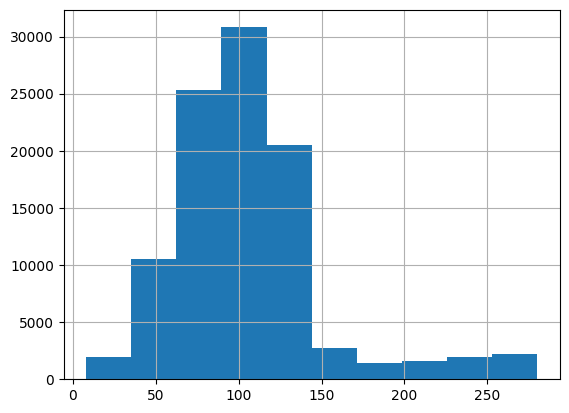

In [34]:
df_normal_users = df[df["tweet_len"] <= 280]
print(len(df_normal_users))
df_normal_users["tweet_len"].hist()

(array([[<Axes: title={'center': 'tweet_len'}>]], dtype=object),
 array([[<Axes: title={'center': 'tweet_len'}>]], dtype=object))

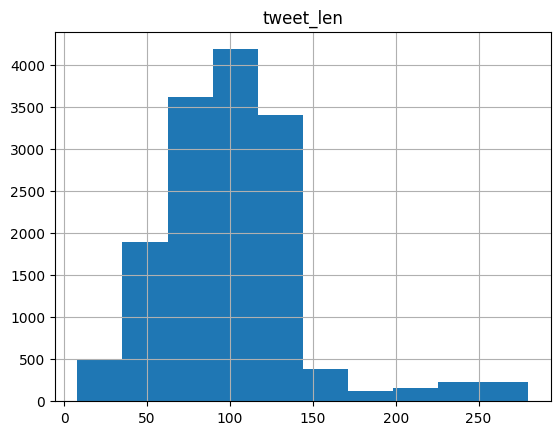

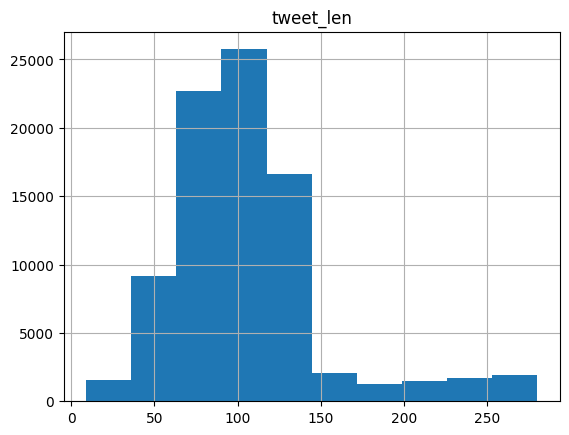

In [32]:
df_long = df_normal_users[df_normal_users["keyword"].isin(long_form)]
df_short = df_normal_users[df_normal_users["keyword"].isin(short_form)]
df_short.hist(), df_long.hist()